<a href="https://colab.research.google.com/github/HYChangTAMU/FINC637_Group2_Fall_2023/blob/main/Assignment3/Hao-Yuan/project3_Hao-Yuan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Group 2 Members**:\
Gajendra Choudhary\
Himanshu Singh\
Xiying Wang\
Hao-Yuan Chang

In [ ]:
!git clone https://github.com/HYChangTAMU/FINC637_Group2_Fall_2023.git
%cd FINC637_Group2_Fall_2023
!pwd

Cloning into 'FINC637_Group2_Fall_2023'...
remote: Enumerating objects: 483, done.
remote: Counting objects: 100% (175/175), done.
remote: Compressing objects: 100% (120/120), done.
remote: Total 483 (delta 54), reused 167 (delta 49), pack-reused 308
Receiving objects: 100% (483/483), 59.92 MiB | 17.07 MiB/s, done.
Resolving deltas: 100% (142/142), done.
Updating files: 100% (160/160), done.
/content/FINC637_Group2_Fall_2023
/content/FINC637_Group2_Fall_2023


# Assignment 3

The risk and return datasets come from [French's Data Library](https://mba.tuck.dartmouth.edu/pages/faculty/ken.french/data_library.html.).\
We downloaded the following datasets:
1. Fama/French 3 Factors daily/monthly data
2. Fama/French 5 Factors daily/monthly data
3. Momentum Factor daily/monthly data
4. 25 Portfolios Formed on Size and Book-to-Market (5 x 5) daily/monthly data
5. 25 Portfolios Formed on Size and Operating Profitability (5 x 5) daily/monthly data
6. 25 Portfolios Formed on Size and Investment (5 x 5) daily/monthly data
7. 25 Portfolios Formed on Book-to-Market and Operating Profitability (5 x 5) daily/monthly data
8. 25 Portfolios Formed on Book-to-Market and Investment (5 x 5) daily/monthly data
9. 25 Portfolios Formed on Operating Profitability and Investment (5 x 5) daily/monthly
data
10. 48 Industry portfolios daily/monthly data (one industry may need to drop due to
missing data)

The first three are the risk factors, and the latter seven are the return for different portfolios.\
We have cleaned the datasets, so that they can be read into pandas dataframes.\
We also merged some of the datasets to accomodate for the regressions.

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from google.colab import files

# Reading data csv files into dataframe
data_path = "./Assignment3/Clean Data/"
factor_3_daily = pd.read_csv(data_path + "3_factors_daily.csv") # 1926-07-01 to 2023-07-31, 25543 rows
factor_3_monthly = pd.read_csv(data_path + "3_factors_monthly.csv") # 1926-07 to 2023-07, 1165 rows
factor_5_daily = pd.read_csv(data_path + "5_factors_daily.csv") # 1963-07-01 to 2023-07-31, 15123 rows
factor_5_monthly = pd.read_csv(data_path + "5_factors_monthly.csv") # 1963-07 to 2023-07, 721 rows
factor_momentum_daily = pd.read_csv(data_path + "momentum_factor_daily.csv") # 1926-11-03 to 2023-07-31, 25442 rows
factor_momentum_monthly = pd.read_csv(data_path + "momentum_factor_monthly.csv") # 1927-01 to 2023-07, 1159 rows
BM_INV_AVWR_daily = pd.read_csv(data_path + "25_Portfolios_BM_INV_daily/Average Value Weighted Returns.csv") # 1963-07-01 to 2023-07-31, 15123 rows
BM_INV_AVWR_monthly = pd.read_csv(data_path + "25_Portfolios_BM_INV_monthly/Average Value Weighted Returns.csv") # 1963-07 to 2023-07, 721 rows
BM_OP_AVWR_daily = pd.read_csv(data_path + "25_portfolios_BM_OP_daily/Average Value Weighted Returns.csv") # 1963-07-01 to 2023-07-31, 15123 rows
BM_OP_AVWR_monthly = pd.read_csv(data_path + "25_portfolios_BM_OP_monthly/Average_Value_Weighted_Return.csv") # 1963-07 to 2023-07, 721 rows
BM_OP_AVWR_monthly.rename(columns = {'Monthly':'Date'}, inplace = True)
ME_BM_AVWR_daily = pd.read_csv(data_path + "25_portfolios_ME_BM_daily/Average Value Weighted Returns.csv") # 1926-07-01 to 2023-07-31, 25543 rows
ME_BM_AVWR_daily = ME_BM_AVWR_daily[10420:25543].reset_index(drop=True) # 1963-07-01 to 2023-07-31, 15123 rows
ME_BM_AVWR_monthly = pd.read_csv(data_path + "25_portfolios_ME_BM_monthly/Average Value Weighted Returns.csv") # 1926-07 to 2023-07, 1165 rows
ME_INV_AVWR_daily = pd.read_csv(data_path + "25_portfolios_ME_INV_daily/Average Value Weighted Returns.csv") # 1963-07-01 to 2023-07-31, 15123 rows
ME_INV_AVWR_monthly = pd.read_csv(data_path + "25_portfolios_ME_INV_monthly/Average Value Weighted Returns.csv") # 1963-07 to 2023-07, 721 rows
ME_OP_AVWR_daily = pd.read_csv(data_path + "25_portfolios_ME_OP_daily/Average Value Weighted Returns.csv") # 1963-07-01 to 2023-07-31, 15123 rows
ME_OP_AVWR_monthly = pd.read_csv(data_path + "25_portfolios_ME_OP_monthly/Average Value Weighted Returns.csv") # 1963-07 to 2023-07, 721 rows
OP_INV_AVWR_daily = pd.read_csv(data_path + "25_portfolios_OP_INV_daily/Average_Value_Weighted_Returns.csv") # 1963-07-01 to 2023-07-31, 15123 rows
OP_INV_AVWR_daily.rename(columns = {'Daily':'Date'}, inplace = True)
OP_INV_AVWR_monthly = pd.read_csv(data_path + "25_portfolios_OP_INV_monthly/Average Value Weighted Returns.csv", skiprows=[0]) # 1963-07 to 2023-07, 721 rows
Industry_daily = pd.read_csv(data_path + "48_industry_portfolios_daily/Average Value Weighted Returns.csv") # 1926-07-01 to 2023-07-31, 25543 rows
Industry_monthly = pd.read_csv(data_path + "48_industry_portfolios_monthly/Average Value Weighted Returns.csv") # 1926-07 to 2023-07, 1165 rows

# The market model and 6-factor model risk factors comes from other datasets
factor_1_daily = factor_3_daily[['Date', 'Mkt-RF', 'RF']] # 1926-07-01 to 2023-07-31, 25543 rows
factor_1_monthly = factor_3_monthly[['Date', 'Mkt-RF', 'RF']] # 1926-07 to 2023-07, 1165 rows
factor_6_daily = factor_5_daily.merge(factor_momentum_daily, on = 'Date', how = 'inner') # 1963-07-01 to 2023-07-31, 15123 rows
factor_6_daily = factor_6_daily[['Date', 'Mkt-RF', 'SMB', 'HML', 'RMW', 'CMA', 'Mom   ','RF']]
factor_6_monthly = factor_5_monthly.merge(factor_momentum_monthly, on = 'Date', how = 'inner') # 1963-07 to 2023-07, 721 rows
factor_6_monthly = factor_6_monthly[['Date', 'Mkt-RF', 'SMB', 'HML', 'RMW', 'CMA', 'Mom   ','RF']]

# Merging datasets to prepare for regression
def inner_join_on_Date(files):
  if len(files) == 1:
    return files
  else:
    merged_data = files[0]
    for i in files[1:]:
      merged_data = merged_data.merge(i, on = 'Date', how = 'inner')
    return merged_data

pf_150_daily_files = [ME_BM_AVWR_daily, ME_INV_AVWR_daily, ME_OP_AVWR_daily, BM_INV_AVWR_daily, BM_OP_AVWR_daily, OP_INV_AVWR_daily]
pf_150_daily = inner_join_on_Date(pf_150_daily_files) # 1963-07-01 to 2023-07-31, 15123 rows
pf_150_monthly_files = [ME_BM_AVWR_monthly, ME_INV_AVWR_monthly, ME_OP_AVWR_monthly, BM_INV_AVWR_monthly, BM_OP_AVWR_monthly, OP_INV_AVWR_monthly]
pf_150_monthly = inner_join_on_Date(pf_150_monthly_files) # 1963-07 to 2023-07, 721 rows
pf_198_daily_files = pf_150_daily_files + [Industry_daily]
pf_198_daily = inner_join_on_Date(pf_198_daily_files) # 1963-07-01 to 2023-07-31, 15123 rows
pf_198_monthly_files = pf_150_monthly_files + [Industry_monthly]
pf_198_monthly = inner_join_on_Date(pf_198_monthly_files) # 1963-07 to 2023-07, 721 rows

## Part A

In this part, we run the Fama-MacBeth two-stage regression using **monthly** data to test the following models:
1. market model (Mkt-RF)
2. 3-factor model (Mkt-RF, SMB, HML)
3. 5-factor model (Mkt-RF, SMB, HML, RMW, CMA)
4. 6-factor model (Mkt-RF, SMB, HML, RMW, CMA, Mom)

The portfolios are:\
a. 25 Portfolios Formed on Size and Book-to-Market\
b. All portfolios except 48 industry portfolios\
c. All portfolios

**Note that** there are missing data in 48 industry fortfolios.\
The following regression are done without dropping any data.\
We have to later decide whether to drop some industries or some dates.

In [ ]:
# function for n-factor regression

def n_factor_regression(df, n = 3):
  # checking data type: monthly or daily
  # inner join to avoid empty rows
  if len(df.index) < 2000:
    risk_dict = {1: factor_1_monthly, 3: factor_3_monthly, 5: factor_5_monthly, 6: factor_6_monthly}
    merged_data = df.merge(risk_dict[n], on = 'Date', how = 'inner')
  else:
    risk_dict = {1: factor_1_daily, 3: factor_3_daily, 5: factor_5_daily, 6: factor_6_daily}
    merged_data = df.merge(risk_dict[n], on = 'Date', how = 'inner')

  # first stage regression
  formula_dict = {1: 'Ex Rtn ~ Mkt-RF', 3: 'Ex Rtn ~ Mkt-RF + SMB + HML', 5: 'Ex Rtn ~ Mkt-RF + SMB + HML + RMW + CMA', 6: 'Ex Rtn ~ Mkt-RF + SMB + HML + RMW + CMA + mon'}
  formula = formula_dict[n] # select formula for different factor model
  fir_rg = merged_data[merged_data.columns[-(n+1):-1]] # arranging the data for first stage into the desired form
  fir_rg_results = {} # create a dictionary to save the betas

  for x in merged_data.columns[1:-(n+1)]:
    data = fir_rg
    y = merged_data[x] - merged_data['RF']
    X = data
    X = sm.add_constant(X)
    model = sm.OLS(y, X).fit()
    fir_rg_results[x] = model.params

  beta_df = pd.DataFrame(fir_rg_results)

  # second stage regression
  formula_dict = {1: 'Ex Rtn ~ beta_Mkt-RF', 3: 'Ex Rtn ~ beta_Mkt-RF + beta_SMB + beta_HML', 5: 'Ex Rtn ~ beta_Mkt-RF + beta_SMB + beta_HML + beta_RMW + beta_CMA', 6: 'Ex Rtn ~ beta_Mkt-RF + beta_SMB + beta_HML + beta_RMW + beta_CMA + beta_mon'}
  formula = formula_dict[n] # select formula for different factor model
  sec_reg = beta_df.iloc[1:(n+1)].transpose() # arranging the data for second stage into the desired form
  sec_regression_results = {} # create a dictionary to save the lambdas

  for d in range(len(merged_data.index)):
    sec_reg['Ex Rtn'] = merged_data.iloc[d][1:-(n+1)] - merged_data.iloc[d][-1]
    data = sec_reg[sec_reg.columns[:-1]]
    y = sec_reg['Ex Rtn']
    X = data
    X = sm.add_constant(X)
    model = sm.OLS(y, X).fit()
    sec_regression_results[d] = model.params

  betas, lambdas = pd.DataFrame(fir_rg_results), pd.DataFrame(sec_regression_results)
  lambdas.rename(index = {'const':'alpha', 'Mkt-RF':'lambda_Mkt-RF', 'SMB': 'lambda_SMB', 'HML': 'lambda_HML', 'RMW': 'lambda_RMW', 'CMA': 'lambda_CMA', 'Mom   ': 'lambda_Mom'}, inplace = True)
  lambdas_stat = lambdas.transpose().describe()[0:3]
  lambdas_stat.loc['t-stat'] = (lambdas_stat.loc['mean'] * lambdas_stat.loc['count']**0.5 / lambdas_stat.loc['std'])

  return betas, lambdas, lambdas_stat.iloc[[1, 3]]

In [ ]:
ME_BM_monthly_1_factor_beta, ME_BM_monthly_1_factor_lambda, ME_BM_monthly_1_factor_stat = n_factor_regression(ME_BM_AVWR_monthly, n = 1)
ME_BM_monthly_3_factor_beta, ME_BM_monthly_3_factor_lambda, ME_BM_monthly_3_factor_stat = n_factor_regression(ME_BM_AVWR_monthly, n = 3)
ME_BM_monthly_5_factor_beta, ME_BM_monthly_5_factor_lambda, ME_BM_monthly_5_factor_stat = n_factor_regression(ME_BM_AVWR_monthly, n = 5)
ME_BM_monthly_6_factor_beta, ME_BM_monthly_6_factor_lambda, ME_BM_monthly_6_factor_stat = n_factor_regression(ME_BM_AVWR_monthly, n = 6)
pf_150_monthly_1_factor_beta, pf_150_monthly_1_factor_lambda, pf_150_monthly_1_factor_stat = n_factor_regression(pf_150_monthly, n = 1)
pf_150_monthly_3_factor_beta, pf_150_monthly_3_factor_lambda, pf_150_monthly_3_factor_stat = n_factor_regression(pf_150_monthly, n = 3)
pf_150_monthly_5_factor_beta, pf_150_monthly_5_factor_lambda, pf_150_monthly_5_factor_stat = n_factor_regression(pf_150_monthly, n = 5)
pf_150_monthly_6_factor_beta, pf_150_monthly_6_factor_lambda, pf_150_monthly_6_factor_stat = n_factor_regression(pf_150_monthly, n = 6)
pf_198_monthly_1_factor_beta, pf_198_monthly_1_factor_lambda, pf_198_monthly_1_factor_stat = n_factor_regression(pf_198_monthly, n = 1)
pf_198_monthly_3_factor_beta, pf_198_monthly_3_factor_lambda, pf_198_monthly_3_factor_stat = n_factor_regression(pf_198_monthly, n = 3)
pf_198_monthly_5_factor_beta, pf_198_monthly_5_factor_lambda, pf_198_monthly_5_factor_stat = n_factor_regression(pf_198_monthly, n = 5)
pf_198_monthly_6_factor_beta, pf_198_monthly_6_factor_lambda, pf_198_monthly_6_factor_stat = n_factor_regression(pf_198_monthly, n = 6)

**25 portfolios on size and book-to-market**

In [ ]:
ME_BM_monthly_1_factor_stat

,alpha,lambda_Mkt-RF
mean,0.389142,0.412725
t-stat,1.200728,1.176577


In [ ]:
ME_BM_monthly_3_factor_stat

,alpha,lambda_Mkt-RF,lambda_SMB,lambda_HML
mean,1.718669,-0.983961,0.117099,0.370934
t-stat,4.342649,-2.392684,1.182893,3.434357


In [ ]:
ME_BM_monthly_5_factor_stat

,alpha,lambda_Mkt-RF,lambda_SMB,lambda_HML,lambda_RMW,lambda_CMA
mean,0.836547,-0.299957,0.279004,0.268958,0.468282,0.083997
t-stat,3.059783,-0.931578,2.417060,2.353964,2.792435,0.509728


In [ ]:
ME_BM_monthly_6_factor_stat

,alpha,lambda_Mkt-RF,lambda_SMB,lambda_HML,lambda_RMW,lambda_CMA,lambda_Mom
mean,0.337011,0.242614,0.307742,0.318063,0.647158,-0.118777,2.925242
t-stat,1.101251,0.690303,2.655201,2.786385,3.625054,-0.693109,4.323840


**150 portfolio**

In [ ]:
pf_150_monthly_1_factor_stat

,alpha,lambda_Mkt-RF
mean,0.923822,-0.210295
t-stat,3.153662,-0.625205


In [ ]:
pf_150_monthly_3_factor_stat

,alpha,lambda_Mkt-RF,lambda_SMB,lambda_HML
mean,1.047961,-0.443979,0.120052,0.293524
t-stat,4.737987,-1.616011,1.038054,2.542525


In [ ]:
pf_150_monthly_5_factor_stat

,alpha,lambda_Mkt-RF,lambda_SMB,lambda_HML,lambda_RMW,lambda_CMA
mean,0.404021,0.169182,0.221187,0.225323,0.269340,0.190624
t-stat,1.733561,0.591621,1.934262,1.966654,3.064533,2.331153


In [ ]:
pf_150_monthly_6_factor_stat

,alpha,lambda_Mkt-RF,lambda_SMB,lambda_HML,lambda_RMW,lambda_CMA,lambda_Mom
mean,0.112192,0.467120,0.226324,0.256716,0.273758,0.207114,0.905798
t-stat,0.478297,1.630431,1.978537,2.242242,3.117013,2.533259,2.693987


**150 portfolio + 48 industry**\
Note that there are missing data (-99.99) in the 48 industry dataset.\
We did not remove those values.

In [ ]:
pf_198_monthly_1_factor_stat

,alpha,lambda_Mkt-RF
mean,0.849313,-0.198263
t-stat,3.826875,-0.712244


In [ ]:
pf_198_monthly_3_factor_stat

,alpha,lambda_Mkt-RF,lambda_SMB,lambda_HML
mean,1.347040,-0.859761,0.325877,0.372210
t-stat,7.246292,-3.435832,2.738645,3.172305


In [ ]:
pf_198_monthly_5_factor_stat

,alpha,lambda_Mkt-RF,lambda_SMB,lambda_HML,lambda_RMW,lambda_CMA
mean,3.003024,-2.384664,0.177816,0.624166,-0.378015,-0.559561
t-stat,9.550573,-6.747952,1.555406,5.016687,-3.556530,-4.772373


In [ ]:
pf_198_monthly_6_factor_stat

,alpha,lambda_Mkt-RF,lambda_SMB,lambda_HML,lambda_RMW,lambda_CMA,lambda_Mom
mean,2.131268,-1.480337,0.185436,0.693946,-0.288679,-0.530179,2.182010
t-stat,7.893516,-4.699764,1.621949,5.460867,-2.834911,-4.571559,6.136761


## Part B

In this part, we run the Fama-MacBeth two-stage regression using **daily data** and **rolling window** to test the models.\
We pick the same portfolios as in the previous part.

Since we have to move the window one month each time, let's find the start and end of each month.

In [ ]:
month_start_end = []
dates = pf_150_daily['Date'][0:-1].tolist()
for i, d in enumerate(dates):
  if d%100 < dates[i-1]%100:
    month_start_end.append(dates[i-1])
    month_start_end.append(d)
month_start_end.append(month_start_end[0])
month_start_end = month_start_end[1:]

mse_index = []
for i in range(len(month_start_end)//2):
  mse_index.append(pf_150_daily['Date'].index[pf_150_daily['Date'] == month_start_end[2*i]].tolist())
  mse_index.append(pf_150_daily['Date'].index[pf_150_daily['Date'] == month_start_end[2*i + 1]].tolist())

month_start_end_index = []
for i in range(1442):
  month_start_end_index.append(mse_index[i][0])
month_start_end[-1] = 20230731
month_start_end_index[-1] = 15123

For each one year window, we calculate the daily excess return and get the betas from the first stage regression.\
Using the average excess return, we get one set of lambdas (1, 3, 5, or 6) for the window.\
Now, move the starting date of the window to the first date of the next month and repeat the above process.\
Eventually, we get 710 sets of lambdas, and the mean and t-statistics are presented.

In [ ]:
def n_factor_rolling_window_regression(df, n = 3):
  risk_dict = {1: factor_1_daily, 3: factor_3_daily, 5: factor_5_daily, 6: factor_6_daily}
  merged_data = df.merge(risk_dict[n], on = 'Date', how = 'inner')

  # first stage regression
  formula_dict = {1: 'Ex Rtn ~ Mkt-RF', 3: 'Ex Rtn ~ Mkt-RF + SMB + HML', 5: 'Ex Rtn ~ Mkt-RF + SMB + HML + RMW + CMA', 6: 'Ex Rtn ~ Mkt-RF + SMB + HML + RMW + CMA + mon'}
  formula = formula_dict[n]
  fir_rg = merged_data[merged_data.columns[-(n+1):-1]]
  merged_data = merged_data[merged_data.columns[1:-(n+1)]].sub(merged_data['RF'], axis = 0)
  fir_rg_results = {}

  for x in merged_data.columns:
    data = fir_rg
    y = merged_data[x]
    X = data
    X = sm.add_constant(X)
    model = sm.OLS(y, X).fit()
    fir_rg_results[x] = model.params

  beta_df = pd.DataFrame(fir_rg_results)

  # second stage regression
  formula_dict = {1: 'Ex Rtn ~ beta_Mkt-RF', 3: 'Ex Rtn ~ beta_Mkt-RF + beta_SMB + beta_HML', 5: 'Ex Rtn ~ beta_Mkt-RF + beta_SMB + beta_HML + beta_RMW + beta_CMA', 6: 'Ex Rtn ~ beta_Mkt-RF + beta_SMB + beta_HML + beta_RMW + beta_CMA + beta_mon'}
  formula = formula_dict[n]
  sec_reg = beta_df.iloc[1:(n+1)].transpose()

  sec_reg['Ex Rtn'] = merged_data.iloc[:].mean()
  y = sec_reg['Ex Rtn']
  X = sec_reg[sec_reg.columns[:-1]]
  X = sm.add_constant(X)
  model = sm.OLS(y, X).fit()

  return model.params


windows = []
for i in range(710):
  windows.append([month_start_end_index[2*i], month_start_end_index[2*i + 23] + 1])

def rolling_window_regression(df, n = 3):
  lambdas = {}
  for i, win in enumerate(windows):
    lambdas[i] = n_factor_rolling_window_regression(df[windows[i][0]:windows[i][1]], n)

  lambdas = pd.DataFrame(lambdas)
  lambdas.rename(index = {'const':'alpha', 'Mkt-RF':'lambda_Mkt-RF', 'SMB': 'lambda_SMB', 'HML': 'lambda_HML', 'RMW': 'lambda_RMW', 'CMA': 'lambda_CMA', 'Mom   ': 'lambda_Mom'}, inplace = True)
  lambdas_stat = lambdas.transpose().describe()[0:3]
  lambdas_stat.loc['t-stat'] = (lambdas_stat.loc['mean'] * lambdas_stat.loc['count']**0.5 / lambdas_stat.loc['std'])

  return lambdas, lambdas_stat.iloc[[1, 3]]

In [ ]:
ME_BM_daily_1_factor_lambda, ME_BM_daily_1_factor_stat = rolling_window_regression(ME_BM_AVWR_daily, n = 1)
ME_BM_daily_3_factor_lambda, ME_BM_daily_3_factor_stat = rolling_window_regression(ME_BM_AVWR_daily, n = 3)
ME_BM_daily_5_factor_lambda, ME_BM_daily_5_factor_stat = rolling_window_regression(ME_BM_AVWR_daily, n = 5)
ME_BM_daily_6_factor_lambda, ME_BM_daily_6_factor_stat = rolling_window_regression(ME_BM_AVWR_daily, n = 6)
pf_150_daily_1_factor_rolling_window_lambdas, pf_150_daily_1_factor_rolling_window_stat = rolling_window_regression(pf_150_daily, n = 1)
pf_150_daily_3_factor_rolling_window_lambdas, pf_150_daily_3_factor_rolling_window_stat = rolling_window_regression(pf_150_daily, n = 3)
pf_150_daily_5_factor_rolling_window_lambdas, pf_150_daily_5_factor_rolling_window_stat = rolling_window_regression(pf_150_daily, n = 5)
pf_150_daily_6_factor_rolling_window_lambdas, pf_150_daily_6_factor_rolling_window_stat = rolling_window_regression(pf_150_daily, n = 6)
pf_198_daily_1_factor_rolling_window_lambdas, pf_198_daily_1_factor_rolling_window_stat = rolling_window_regression(pf_198_daily, n = 1)
pf_198_daily_3_factor_rolling_window_lambdas, pf_198_daily_3_factor_rolling_window_stat = rolling_window_regression(pf_198_daily, n = 3)
pf_198_daily_5_factor_rolling_window_lambdas, pf_198_daily_5_factor_rolling_window_stat = rolling_window_regression(pf_198_daily, n = 5)
pf_198_daily_6_factor_rolling_window_lambdas, pf_198_daily_6_factor_rolling_window_stat = rolling_window_regression(pf_198_daily, n = 6)

**25 portfolios on size and book-to-market**

In [ ]:
ME_BM_daily_1_factor_stat

,alpha,lambda_Mkt-RF
mean,0.045319,-0.014130
t-stat,11.715737,-3.467973


In [ ]:
ME_BM_daily_3_factor_stat

,alpha,lambda_Mkt-RF,lambda_SMB,lambda_HML
mean,0.041005,-0.012509,0.003883,0.013187
t-stat,14.185129,-3.814978,2.180259,6.643659


In [ ]:
ME_BM_daily_5_factor_stat

,alpha,lambda_Mkt-RF,lambda_SMB,lambda_HML,lambda_RMW,lambda_CMA
mean,0.035321,-0.006125,0.006334,0.013133,0.011384,0.008341
t-stat,12.446781,-2.036998,3.631196,6.670777,5.970609,4.966896


In [ ]:
ME_BM_daily_6_factor_stat

,alpha,lambda_Mkt-RF,lambda_SMB,lambda_HML,lambda_RMW,lambda_CMA,lambda_Mom
mean,0.039056,-0.009529,0.006212,0.014077,0.011587,0.008801,0.072576
t-stat,13.190810,-3.124345,3.585189,7.223286,6.225348,5.511750,18.702627


**150 portfolio**

In [ ]:
pf_150_daily_1_factor_rolling_window_stat

,alpha,lambda_Mkt-RF
mean,0.038485,-0.007642
t-stat,11.560351,-2.090486


In [ ]:
pf_150_daily_3_factor_rolling_window_stat

,alpha,lambda_Mkt-RF,lambda_SMB,lambda_HML
mean,0.032183,-0.003391,0.003739,0.010304
t-stat,13.489311,-1.122851,2.157428,5.503239


In [ ]:
pf_150_daily_5_factor_rolling_window_stat

,alpha,lambda_Mkt-RF,lambda_SMB,lambda_HML,lambda_RMW,lambda_CMA
mean,0.026555,0.002761,0.006686,0.009428,0.009356,0.009732
t-stat,11.366362,0.949655,3.788034,5.033696,7.079605,7.950611


In [ ]:
pf_150_daily_6_factor_rolling_window_stat

,alpha,lambda_Mkt-RF,lambda_SMB,lambda_HML,lambda_RMW,lambda_CMA,lambda_Mom
mean,0.029972,-0.000285,0.006283,0.010374,0.009184,0.009747,0.073751
t-stat,12.977122,-0.102267,3.601803,5.597974,7.180016,8.283935,31.308431


**150 portfolio + 48 industry**\
Note that there are missing data (-99.99) in the 48 industry dataset.\
We did not remove those values.

In [ ]:
pf_198_daily_1_factor_rolling_window_stat

,alpha,lambda_Mkt-RF
mean,-0.614477,0.576382
t-stat,-7.009658,7.261815


In [ ]:
pf_198_daily_3_factor_rolling_window_stat

,alpha,lambda_Mkt-RF,lambda_SMB,lambda_HML
mean,-0.817854,0.793768,0.020090,0.080297
t-stat,-8.049535,8.372067,2.538238,5.090588


In [ ]:
pf_198_daily_5_factor_rolling_window_stat

,alpha,lambda_Mkt-RF,lambda_SMB,lambda_HML,lambda_RMW,lambda_CMA
mean,-0.935673,0.916567,0.053172,0.027251,-0.051446,0.038836
t-stat,-7.948547,8.180677,5.981818,2.825659,-4.829886,2.444877


In [ ]:
pf_198_daily_6_factor_rolling_window_stat

,alpha,lambda_Mkt-RF,lambda_SMB,lambda_HML,lambda_RMW,lambda_CMA,lambda_Mom
mean,-1.115831,1.101981,0.082203,-0.020338,-0.021584,-0.001027,0.061692
t-stat,-7.843518,8.038428,6.370883,-2.451639,-2.695222,-0.069960,2.502601


## Part C

In this part, we run the Fama-MacBeth two-stage regression using **daily data** and **rolling window** with **out-of-sample data** to test the models.

We already have the start and end dates of each month.\
Because we use the one month ahead average return for the second stage regression, there will be one less windows in this case.

In [ ]:
windows = []
for i in range(710):
  windows.append([month_start_end_index[2*i], month_start_end_index[2*i + 23] + 1])

def month_ahead_return(df, i):
  merged_data = df[windows[i][1]:windows[i+1][1]].merge(factor_3_daily, on = 'Date', how = 'inner')
  ex_return = merged_data.mean().sub(merged_data.mean().iloc[-1])
  return ex_return[1:-4]

def out_of_sample_rolling_window_regression(df, n = 3):
  lambdas = {}
  betas = {}
  # real_ret_df = pd.DataFrame()
  real_ret = {}
  for i in range(709):
    risk_dict = {1: factor_1_daily, 3: factor_3_daily, 5: factor_5_daily, 6: factor_6_daily}
    merged_data = df[windows[i][0]:windows[i][1]].merge(risk_dict[n], on = 'Date', how = 'inner')

    # first stage regression
    formula_dict = {1: 'Ex Rtn ~ Mkt-RF', 3: 'Ex Rtn ~ Mkt-RF + SMB + HML', 5: 'Ex Rtn ~ Mkt-RF + SMB + HML + RMW + CMA', 6: 'Ex Rtn ~ Mkt-RF + SMB + HML + RMW + CMA + mon'}
    formula = formula_dict[n]
    fir_rg = merged_data[merged_data.columns[-(n+1):-1]]
    merged_data = merged_data[merged_data.columns[1:-(n+1)]].sub(merged_data['RF'], axis = 0)
    fir_rg_results = {}

    for x in merged_data.columns:
      data = fir_rg
      y = merged_data[x]
      X = data
      X = sm.add_constant(X)
      model = sm.OLS(y, X).fit()
      fir_rg_results[x] = model.params


    beta_df = pd.DataFrame(fir_rg_results)
    betas[i] = beta_df

    # second stage regression
    formula_dict = {1: 'Ex Rtn ~ beta_Mkt-RF', 3: 'Ex Rtn ~ beta_Mkt-RF + beta_SMB + beta_HML', 5: 'Ex Rtn ~ beta_Mkt-RF + beta_SMB + beta_HML + beta_RMW + beta_CMA', 6: 'Ex Rtn ~ beta_Mkt-RF + beta_SMB + beta_HML + beta_RMW + beta_CMA + beta_mon'}
    formula = formula_dict[n]
    sec_reg = beta_df.iloc[1:(n+1)].transpose()

    sec_reg['Ex Rtn'] = month_ahead_return(df, i)
    real_ret[i] = sec_reg['Ex Rtn']
    # real_ret_df[i] = sec_reg['Ex Rtn']
    y = sec_reg['Ex Rtn']
    X = sec_reg[sec_reg.columns[:-1]]
    X = sm.add_constant(X)
    model = sm.OLS(y, X).fit()

    lambdas[i] = model.params

  lambdas = pd.DataFrame(lambdas)
  lambdas.rename(index = {'const':'alpha', 'Mkt-RF':'lambda_Mkt-RF', 'SMB': 'lambda_SMB', 'HML': 'lambda_HML', 'RMW': 'lambda_RMW', 'CMA': 'lambda_CMA', 'Mom   ': 'lambda_Mom'}, inplace = True)
  lambdas_stat = lambdas.transpose().describe()[0:3]
  lambdas_stat.loc['t-stat'] = (lambdas_stat.loc['mean'] * lambdas_stat.loc['count']**0.5 / lambdas_stat.loc['std'])

  pred_ret_df = pd.DataFrame()
  stats_np = lambdas_stat.iloc[[1, 3]].to_numpy()[0]
  for i in range(709):
    betas_np = betas[i].to_numpy()
    betas_np[0][:] = [1.0]
    rtn = np.matmul(stats_np, betas_np)
    pred_ret = pd.DataFrame(np.transpose(rtn), index = df.columns[1:].tolist()).transpose()
    pred_ret_df = pd.concat([pred_ret_df, pred_ret])

  real_ret_df = pd.DataFrame(real_ret)

  return betas, lambdas, lambdas_stat.iloc[[1, 3]], pred_ret_df.reset_index(drop = True), real_ret_df.transpose()

During the regression, we also saved all the one-month ahead realized return and predicted return.\
Now we can calculate the **(adjusted) R-squared** values and show **the plots** of predicted return vs. realized return.

In [ ]:
def real_vs_pred_plt(file_name):
  real = pd.read_csv('/content/FINC637_Group2_Fall_2023/Assignment3/part_C_results/realized_rtn_' + file_name + '.csv')
  pred = pd.read_csv('/content/FINC637_Group2_Fall_2023/Assignment3/part_C_results/predicted_rtn_' + file_name + '.csv')
  real = real.to_numpy().flatten()
  pred = pred.to_numpy().flatten()
  plt.scatter(real, pred)
  plt.xlabel('realized return')
  plt.ylabel('predicted return')
  plt.title(file_name)
  plt.show()

def adj_r2(file_name, k):
  real = pd.read_csv('/content/FINC637_Group2_Fall_2023/Assignment3/part_C_results/realized_rtn_' + file_name + '.csv')
  pred = pd.read_csv('/content/FINC637_Group2_Fall_2023/Assignment3/part_C_results/predicted_rtn_' + file_name + '.csv')
  real = real.to_numpy().flatten()
  pred = pred.to_numpy().flatten()
  r2 = r2_score(real, pred)
  print('R2 value : ', r2)
  print('Adjusted R2 value : ', 1 - (1 - r2) * (len(real) - 1) / (len(real) - k - 1))

**25 portfolios on size and book-to-market**

In [ ]:
ME_BM_daily_1_factor_out_of_sample_beta, ME_BM_daily_1_factor_out_of_sample_lambda, ME_BM_daily_1_factor_out_of_sample_stat, ME_BM_daily_1_factor_out_of_sample_pred, ME_BM_daily_1_factor_out_of_sample_real = out_of_sample_rolling_window_regression(ME_BM_AVWR_daily, 1)
ME_BM_daily_1_factor_out_of_sample_stat

,alpha,lambda_Mkt-RF
mean,0.045795,-0.014620
t-stat,4.023739,-1.266046


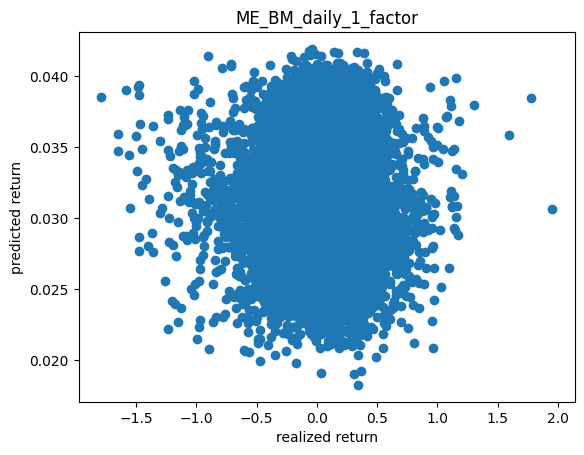

R2 value :  -0.00024503300133882355
Adjusted R2 value :  -0.0003014706830519742


In [ ]:
real_vs_pred_plt('ME_BM_daily_1_factor')
adj_r2('ME_BM_daily_1_factor', 1)

In [ ]:
ME_BM_daily_3_factor_out_of_sample_beta, ME_BM_daily_3_factor_out_of_sample_lambda, ME_BM_daily_3_factor_out_of_sample_stat, ME_BM_daily_3_factor_out_of_sample_pred, ME_BM_daily_3_factor_out_of_sample_real = out_of_sample_rolling_window_regression(ME_BM_AVWR_daily, 3)
ME_BM_daily_3_factor_out_of_sample_stat

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,alpha,lambda_Mkt-RF,lambda_SMB,lambda_HML
mean,0.044301,-0.016743,0.003831,0.012830
t-stat,5.062565,-1.696250,0.669623,2.367738


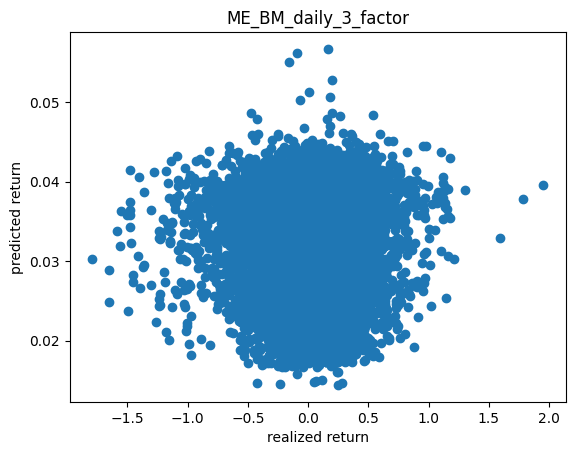

R2 value :  0.0004899392574955197
Adjusted R2 value :  0.00032073152755762724


In [ ]:
real_vs_pred_plt('ME_BM_daily_3_factor')
adj_r2('ME_BM_daily_3_factor', 3)

In [ ]:
ME_BM_daily_5_factor_out_of_sample_beta, ME_BM_daily_5_factor_out_of_sample_lambda, ME_BM_daily_5_factor_out_of_sample_stat, ME_BM_daily_5_factor_out_of_sample_pred, ME_BM_daily_5_factor_out_of_sample_real = out_of_sample_rolling_window_regression(ME_BM_AVWR_daily, 5)
ME_BM_daily_5_factor_out_of_sample_stat

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,alpha,lambda_Mkt-RF,lambda_SMB,lambda_HML,lambda_RMW,lambda_CMA
mean,0.043321,-0.015256,0.006471,0.012494,0.011301,0.004529
t-stat,4.724813,-1.542155,1.170672,2.261433,2.074693,0.811174


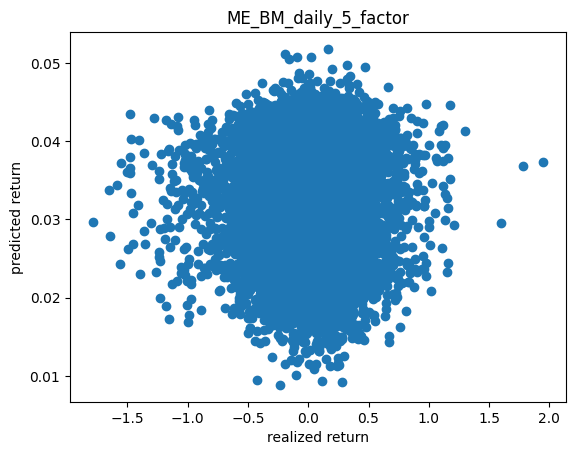

R2 value :  0.000441428019377077
Adjusted R2 value :  0.0001593696154092994


In [ ]:
real_vs_pred_plt('ME_BM_daily_5_factor')
adj_r2('ME_BM_daily_5_factor', 5)

In [ ]:
ME_BM_daily_6_factor_out_of_sample_beta, ME_BM_daily_6_factor_out_of_sample_lambda, ME_BM_daily_6_factor_out_of_sample_stat, ME_BM_daily_6_factor_out_of_sample_pred, ME_BM_daily_6_factor_out_of_sample_real = out_of_sample_rolling_window_regression(ME_BM_AVWR_daily, 6)
ME_BM_daily_6_factor_out_of_sample_stat

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,alpha,lambda_Mkt-RF,lambda_SMB,lambda_HML,lambda_RMW,lambda_CMA,lambda_Mom
mean,0.046207,-0.018496,0.006931,0.012990,0.011822,0.003191,0.012767
t-stat,4.986334,-1.867666,1.253758,2.356616,2.181826,0.559610,1.110816


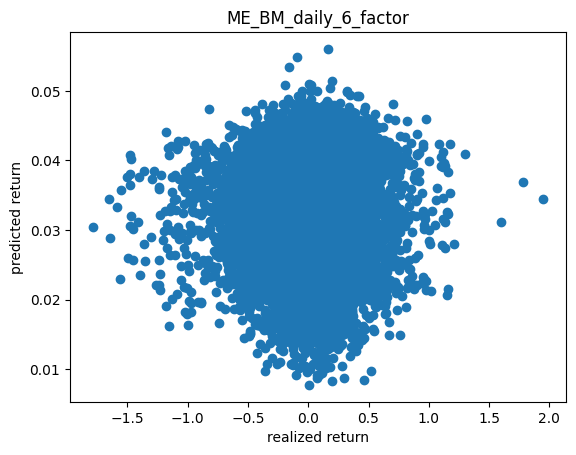

R2 value :  0.0004163436337324411
Adjusted R2 value :  7.784595125159832e-05


In [ ]:
real_vs_pred_plt('ME_BM_daily_6_factor')
adj_r2('ME_BM_daily_6_factor', 6)

**150 portfolio**

In [ ]:
pf_150_daily_1_factor_out_of_sample_beta, pf_150_daily_1_factor_out_of_sample_lambda, pf_150_daily_1_factor_out_of_sample_stat, pf_150_daily_1_factor_out_of_sample_pred, pf_150_daily_1_factor_out_of_sample_real = out_of_sample_rolling_window_regression(pf_150_daily, 1)
pf_150_daily_1_factor_out_of_sample_stat

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,alpha,lambda_Mkt-RF
mean,0.037491,-0.007132
t-stat,3.739407,-0.690813


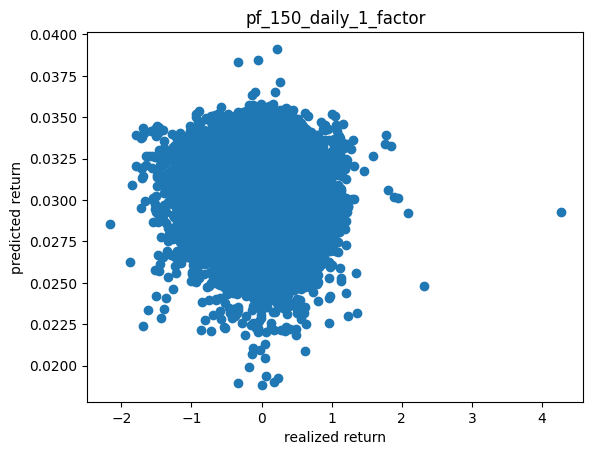

R2 value :  -0.0001168194588396787
Adjusted R2 value :  -0.00012622364904024685


In [ ]:
real_vs_pred_plt('pf_150_daily_1_factor')
adj_r2('pf_150_daily_1_factor', 1)

In [ ]:
pf_150_daily_3_factor_out_of_sample_beta, pf_150_daily_3_factor_out_of_sample_lambda, pf_150_daily_3_factor_out_of_sample_stat, pf_150_daily_3_factor_out_of_sample_pred, pf_150_daily_3_factor_out_of_sample_real = out_of_sample_rolling_window_regression(pf_150_daily, 3)
pf_150_daily_3_factor_out_of_sample_stat

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,alpha,lambda_Mkt-RF,lambda_SMB,lambda_HML
mean,0.034593,-0.007367,0.004480,0.010762
t-stat,4.501112,-0.817589,0.835321,2.091903


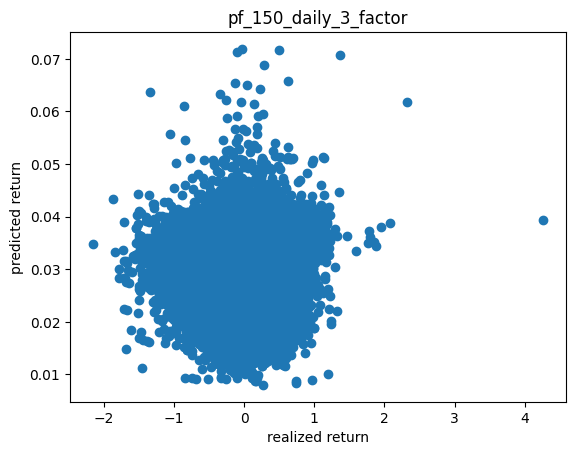

R2 value :  0.0003875912949072857
Adjusted R2 value :  0.00035939242305393915


In [ ]:
real_vs_pred_plt('pf_150_daily_3_factor')
adj_r2('pf_150_daily_3_factor', 3)

In [ ]:
pf_150_daily_5_factor_out_of_sample_beta, pf_150_daily_5_factor_out_of_sample_lambda, pf_150_daily_5_factor_out_of_sample_stat, pf_150_daily_5_factor_out_of_sample_pred, pf_150_daily_5_factor_out_of_sample_real = out_of_sample_rolling_window_regression(pf_150_daily, 5)
pf_150_daily_5_factor_out_of_sample_stat

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,alpha,lambda_Mkt-RF,lambda_SMB,lambda_HML,lambda_RMW,lambda_CMA
mean,0.033503,-0.005721,0.007208,0.009925,0.011497,0.007746
t-stat,4.429192,-0.671911,1.347675,1.904419,3.100508,2.199940


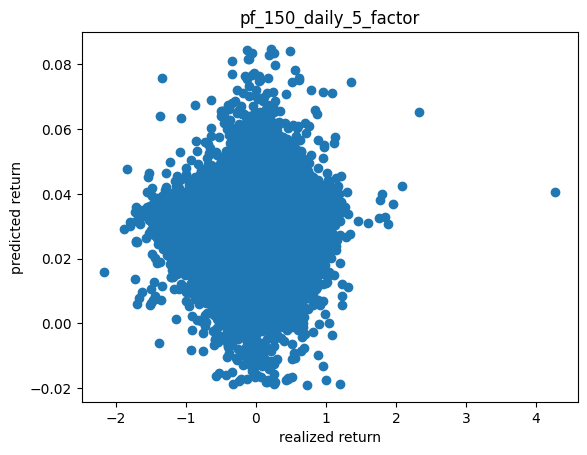

R2 value :  0.0004269792697846331
Adjusted R2 value :  0.0003799821180539009


In [ ]:
real_vs_pred_plt('pf_150_daily_5_factor')
adj_r2('pf_150_daily_5_factor', 5)

In [ ]:
pf_150_daily_6_factor_out_of_sample_beta, pf_150_daily_6_factor_out_of_sample_lambda, pf_150_daily_6_factor_out_of_sample_stat, pf_150_daily_6_factor_out_of_sample_pred, pf_150_daily_6_factor_out_of_sample_real = out_of_sample_rolling_window_regression(pf_150_daily, 6)
pf_150_daily_6_factor_out_of_sample_stat

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,alpha,lambda_Mkt-RF,lambda_SMB,lambda_HML,lambda_RMW,lambda_CMA,lambda_Mom
mean,0.036648,-0.008991,0.007355,0.010312,0.011528,0.007597,0.006682
t-stat,4.966367,-1.101745,1.365351,1.982840,3.151447,2.156414,0.814747


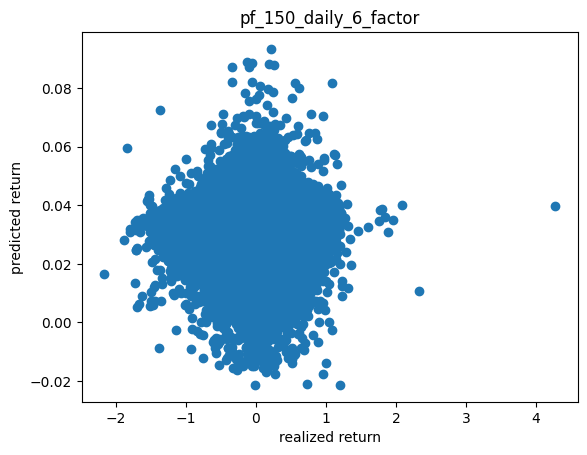

R2 value :  0.0004224578351383901
Adjusted R2 value :  0.0003660604676295476


In [ ]:
real_vs_pred_plt('pf_150_daily_6_factor')
adj_r2('pf_150_daily_6_factor', 6)

**150 portfolio + 48 industry**\
Note that there are missing data (-99.99) in the 48 industry dataset.\
We did not remove those values.\
From the plot, these values clearly formed a separate group.

In [ ]:
pf_198_daily_1_factor_out_of_sample_beta, pf_198_daily_1_factor_out_of_sample_lambda, pf_198_daily_1_factor_out_of_sample_stat, pf_198_daily_1_factor_out_of_sample_pred, pf_198_daily_1_factor_out_of_sample_real = out_of_sample_rolling_window_regression(pf_198_daily, 1)
pf_198_daily_1_factor_out_of_sample_stat

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,alpha,lambda_Mkt-RF
mean,-0.594492,0.559835
t-stat,-7.421359,7.772241


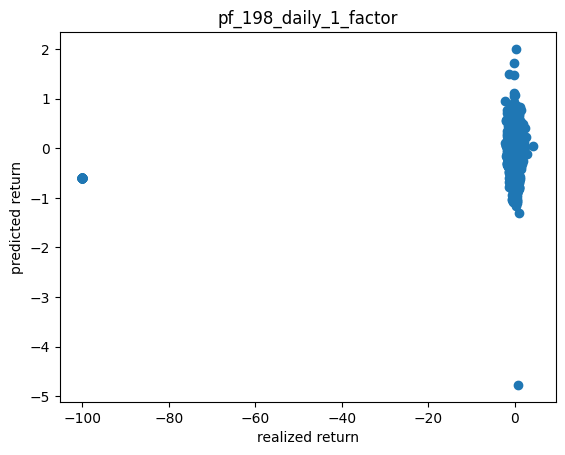

R2 value :  0.005927319055608393
Adjusted R2 value :  0.005920237757126023


In [ ]:
real_vs_pred_plt('pf_198_daily_1_factor')
adj_r2('pf_198_daily_1_factor', 1)

In [ ]:
pf_198_daily_3_factor_out_of_sample_beta, pf_198_daily_3_factor_out_of_sample_lambda, pf_198_daily_3_factor_out_of_sample_stat, pf_198_daily_3_factor_out_of_sample_pred, pf_198_daily_3_factor_out_of_sample_real = out_of_sample_rolling_window_regression(pf_198_daily, 3)
pf_198_daily_3_factor_out_of_sample_stat

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,alpha,lambda_Mkt-RF,lambda_SMB,lambda_HML
mean,-0.766584,0.739527,0.026678,0.072361
t-stat,-7.677902,7.933915,3.075881,4.534886


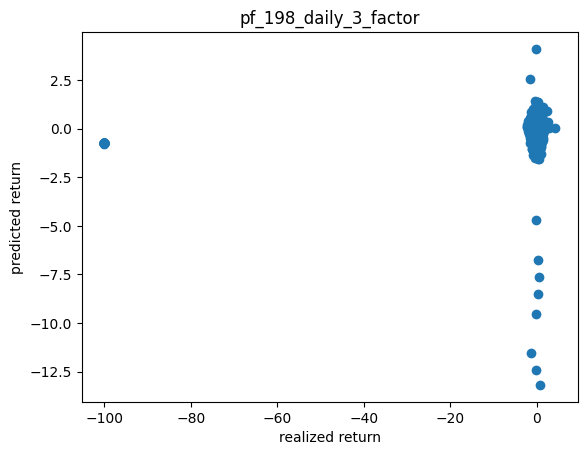

R2 value :  0.008885624150304361
Adjusted R2 value :  0.00886444317374424


In [ ]:
real_vs_pred_plt('pf_198_daily_3_factor')
adj_r2('pf_198_daily_3_factor', 3)

In [ ]:
pf_198_daily_5_factor_out_of_sample_beta, pf_198_daily_5_factor_out_of_sample_lambda, pf_198_daily_5_factor_out_of_sample_stat, pf_198_daily_5_factor_out_of_sample_pred, pf_198_daily_5_factor_out_of_sample_real = out_of_sample_rolling_window_regression(pf_198_daily, 5)
pf_198_daily_5_factor_out_of_sample_stat

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,alpha,lambda_Mkt-RF,lambda_SMB,lambda_HML,lambda_RMW,lambda_CMA
mean,-0.889198,0.868458,0.053664,0.020606,-0.040403,0.039006
t-stat,-7.658910,7.856001,5.565794,2.032041,-3.821772,2.444419


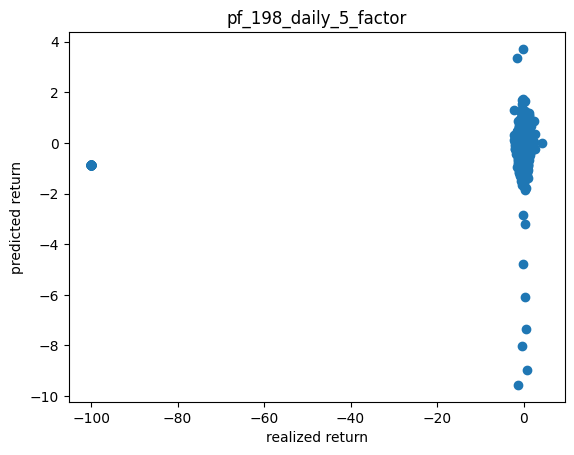

R2 value :  0.011686216919975956
Adjusted R2 value :  0.011651014542679361


In [ ]:
real_vs_pred_plt('pf_198_daily_5_factor')
adj_r2('pf_198_daily_5_factor', 5)

In [ ]:
pf_198_daily_6_factor_out_of_sample_beta, pf_198_daily_6_factor_out_of_sample_lambda, pf_198_daily_6_factor_out_of_sample_stat, pf_198_daily_6_factor_out_of_sample_pred, pf_198_daily_6_factor_out_of_sample_real = out_of_sample_rolling_window_regression(pf_198_daily, 6)
pf_198_daily_6_factor_out_of_sample_stat

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,alpha,lambda_Mkt-RF,lambda_SMB,lambda_HML,lambda_RMW,lambda_CMA,lambda_Mom
mean,-1.084105,1.067916,0.085041,-0.023472,-0.015215,-0.000766,0.008316
t-stat,-7.670964,7.834084,6.316052,-2.460089,-1.729394,-0.051257,0.337124


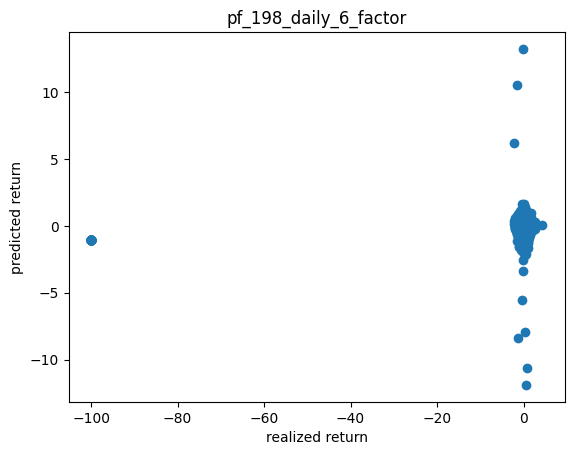

R2 value :  0.01310627862680902
Adjusted R2 value :  0.013064096170329997


In [ ]:
real_vs_pred_plt('pf_198_daily_6_factor')
adj_r2('pf_198_daily_6_factor', 6)